In [44]:
# этот ноутбук относится к лабе 3.1.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyperclip import copy
def latex(d: pd.DataFrame, print_output=False) -> None:
  (print if print_output else copy)(d.to_latex(index=False))

### Константы
расстояние, на котором перестают притягиваться
r = 1.785 # мм +- 0.003

широта долгопрудного: 56 сш

период колебания кольца: 
95.56 / 10с

вес оторвавшийся в методе Б:
257.810г

масса 30 шариков:
24.923г

In [33]:
# диаметры  шариков:

dd = np.array([
  0.6, 0.59, 0.6, 0.59, 0.58, 0.59, 0.59, 0.6, 0.60, 0.6
])
d = np.average(dd)

0.0081

In [43]:
m = 24.923 / 30
r = 1.785
g = 981 # см/с^2
mk_a = np.sqrt(m*g*r**4/6)
m_max = 257.810
F_b = m_max * g
F_0 = F_b / 1.08
mk_b = (F_0 * d**4 / 6)**0.5
print(mk_b, mk_a, F_b)

69.70593711423382 37.13426657735152 252911.61000000002


In [ ]:
# Задание 2. крутильный момент стрелки
a2 = pd.DataFrame()

a2['n'] = np.arange(3, 11)
a2['t'] = ( # в с
  15.13 / 15, 18.47 / 12, 28.39 / 15, 34.75 / 15, 36.45 / 14, 29.52 / 10, 37.39 / 11, 56.00 / 15
)
latex(a2)

 
0.379 x - 0.03295 
eror: 0.00942655105950751


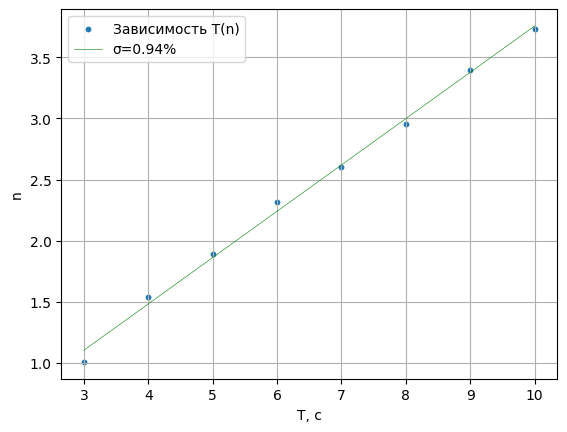

In [90]:
# график пункт 1

# график
ox = a2['n']
oy = a2['t']

plt.scatter(
  ox,
  oy,
  s=10,
  label="Зависимость T(n)"
)


z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.4, color='green', linestyle='-', label=f'σ={round(100*res[0][0] ** 0.5, 2)}%')
print(str(p1), "\neror:", res[0][0] ** 0.5)
plt.xlabel("T, с")
plt.ylabel("n")
plt.grid()
plt.legend(loc='best')
# plt.savefig("T(n).png")
plt.show()
k = p1[1]

In [ ]:
# Задание 3. уравновешиваем всегда на последнем от края

a3 = pd.DataFrame()

a3['n'] = np.arange(4, 11, 2)
a3['m'] = ( # в г
  0.391, 0.267, 0.182, 0.119
)
a3['l'] = d * (a3['n'] / 2 - 1)
a3
latex(a3)

 
-0.04505 x + 0.5551 
 error: 0.00485978


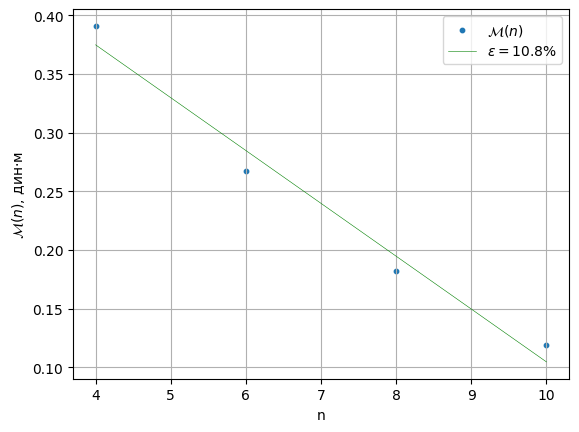

In [136]:
# график пункт 1

# график
ox = a3['n']
oy = a3['m']

plt.scatter(
  ox,
  oy,
  s=10,
  label='$\mathcal{M}(n)$'
)


z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.4, color='green', linestyle='-', label=f'$\epsilon=${abs(round(100*(res[0][0] ** 0.5)/z1[0], 1))}%')
print(str(p1), "\n error:", round(res[0][0] ** 0.5, 8))
plt.xlabel("n")
plt.ylabel("$\mathcal{M}(n)$, дин$\cdot$м")
plt.grid()
plt.legend(loc='best')
plt.savefig("m(n).png")
plt.show()